**Bases de dados reais**

``datases\``
- 000_Av_Nossa_Senhora_da_Penha_30min
- 001_Av_Robert_Kennedy_30min
- 002_Av. Norte Sul_30min
- data_rua_4_8_unscaled
- bike_sharing_2012to2019_inputed

**Resíduos**

- ``<nome_do_modelo>/<nome_da_base>/<residuos>``


**Somas (todas as sextas)**

``sum_all_samples\``
- bikesharing
- ruas_4_8

In [2]:
import numpy as np
import residuos as r
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import pandas as pd
from glob import glob
import seaborn as sns

In [2]:
sns.set_theme()

# Real data

In [3]:
# ruas 1 a 3
rua_I = np.load("datasets/000_Av_Nossa_Senhora_da_Penha_30min.npy")
rua_II = np.load("datasets/001_Av_Robert_Kennedy_30min.npy")
rua_III = np.load("datasets/002_Av. Norte Sul_30min.npy")

rua_I = rua_I.reshape(int(12000/48), 48, 1)
rua_II = rua_II.reshape(11040//48,48,1)
rua_III = rua_III.reshape(12336//48,48,1)

# ruas 4 a 8
rua_48 = np.load("datasets/data_rua_4_8_unscaled.npy", allow_pickle=True)
# bikesharing
bike_real = np.load("datasets/bike_sharing_2012to2019_inputed.npy")

## Figuras somas por intervalo (Fig. 6 e Fig. 8)

In [21]:
list_dates_rI = r.get_list_dates(rua_I.shape[0]*rua_I.shape[1],2019,3,28, timedelta(minutes=30))
df_rI = r.get_df_real(list_dates_rI, rua_I, w=48)

list_dates_rII = r.get_list_dates(rua_II.shape[0]*rua_II.shape[1],2019,4,17, timedelta(minutes=30))
df_rII = r.get_df_real(list_dates_rII, rua_II,w=48)

list_dates_rIII = r.get_list_dates(rua_III.shape[0]*rua_III.shape[1],2019,3,21, timedelta(minutes=30))
df_rIII = r.get_df_real(list_dates_rIII, rua_III,w=48)

list_dates_bike = r.get_list_dates(len(bike_real.flatten()),2011,1,1, timedelta(hours=1))
df_bike = r.get_df_real(list_dates_bike, bike_real)

In [22]:
wks = [r.get_count(df_rI,i,48) for i in range(7)]
wks_II = [r.get_count(df_rII,i,48) for i in range(7)]
wks_III = [r.get_count(df_rIII,i,48) for i in range(7)]
wks_bike = [r.get_count(df_bike,i,24) for i in range(7)]

### Exemplo Bikesharing (Fig. 6)

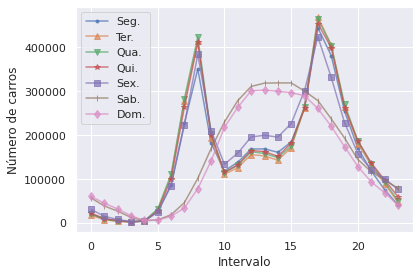

In [23]:
fig, ax = plt.subplots()
ax.plot(wks_bike[0],label='Seg.',marker='.',alpha=0.7)
ax.plot(wks_bike[1],label='Ter.',marker='^',alpha=0.7)
ax.plot(wks_bike[2],label='Qua.',marker='v',alpha=0.7)
ax.plot(wks_bike[3],label='Qui.',marker='*',alpha=0.7)
ax.plot(wks_bike[4],label='Sex.',marker='s',alpha=0.7)
ax.plot(wks_bike[5],label='Sab.',marker='|',alpha=0.7)
ax.plot(wks_bike[6],label='Dom.',marker='d',alpha=0.7)
plt.xlabel("Intervalo", fontdict={'fontsize':12})
plt.ylabel("Número de carros", fontdict={'fontsize':12})
plt.tight_layout()
plt.legend()    
plt.show()
# plt.clf()
# plt.close()

### Exemplo Rua I

FileNotFoundError: [Errno 2] No such file or directory: 'plots/sum_intervals/rua_I.pdf'

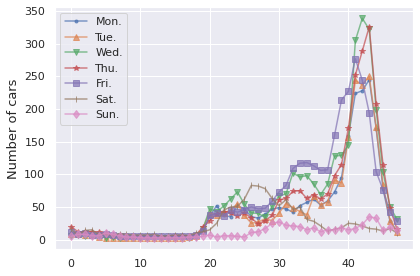

In [24]:
fig, ax = plt.subplots()
week_days = ['Mon.', 'Tue.', 'Wed.', 'Thu.','Fri.', 'Sat.', 'Sun.']
markers = ['.', '^', 'v','*','s','|','d']
for i in range(7):
    ax.plot(wks[i],label=week_days[i],marker=markers[i],alpha=0.7)
plt.ylabel("Number of cars", fontdict={'fontsize':13})
plt.tight_layout()
plt.legend() 
plt.savefig("plots/sum_intervals/rua_I.pdf")   
plt.show()
# plt.clf()
# plt.close()

In [ ]:
fig, ax = plt.subplots()
week_days = ['Mon.', 'Tue.', 'Wed.', 'Thu.','Fri.', 'Sat.', 'Sun.']
markers = ['.', '^', 'v','*','s','|','d']
for i in range(7):
    ax.plot(wks_II[i],label=week_days[i],marker=markers[i],alpha=0.7)
#plt.ylabel("Number of cars", fontdict={'fontsize':13})
plt.tight_layout()
plt.legend() 
plt.savefig("plots/sum_intervals/rua_II.pdf")   
plt.show()
# plt.clf()
# plt.close()

In [ ]:
fig, ax = plt.subplots()
week_days = ['Mon.', 'Tue.', 'Wed.', 'Thu.','Fri.', 'Sat.', 'Sun.']
markers = ['.', '^', 'v','*','s','|','d']
for i in range(7):
    ax.plot(wks_III[i],label=week_days[i],marker=markers[i],alpha=0.7)
#plt.ylabel("Number of cars", fontdict={'fontsize':13})
plt.tight_layout()
#plt.legend() 
plt.savefig("plots/sum_intervals/rua_III.pdf")   
plt.show()
# plt.clf()
# plt.close()

- Fazer as Ruas I a VIII em uma figura só

In [66]:
# a mesma lista paras as ruas de 4 a 8
list_dates_48 = r.get_list_dates(12000,2019,3,28, timedelta(minutes=30))

FileNotFoundError: [Errno 2] No such file or directory: 'plots/sum_intervals/rua_4.pdf'

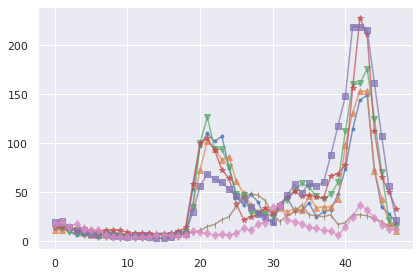

In [67]:
st = 4
for i in range(5):
    df_rua48 = r.get_df_real(list_dates_48, rua_48[:, i].reshape(250,48,1), w=48)
    wks = [r.get_count(df_rua48,i,48) for i in range(7)]

    fig, ax = plt.subplots()
    ax.plot(wks[0],label='Seg.',marker='.',alpha=0.7)
    ax.plot(wks[1],label='Ter.',marker='^',alpha=0.7)
    ax.plot(wks[2],label='Qua.',marker='v',alpha=0.7)
    ax.plot(wks[3],label='Qui.',marker='*',alpha=0.7)
    ax.plot(wks[4],label='Sex.',marker='s',alpha=0.7)
    ax.plot(wks[5],label='Sab.',marker='|',alpha=0.7)
    ax.plot(wks[6],label='Dom.',marker='d',alpha=0.7)
    if (i==1):
        ax.set_ylabel("Number of cars", fontdict={'fontsize':14})
    plt.tight_layout()
    plt.savefig("plots/sum_intervals/rua_{}.pdf".format(st))
    plt.show()

    st+=1
    

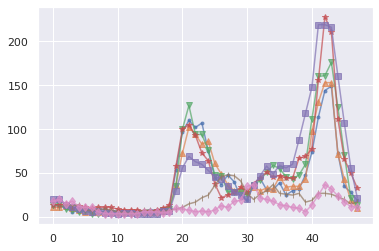

In [73]:
df_rua48 = r.get_df_real(list_dates_48, rua_48[:, 0].reshape(250,48,1), w=48)
wks_r4 = [r.get_count(df_rua48,i,48) for i in range(7)]

fig, ax = plt.subplots()
ax.plot(wks_r4[0],label='Seg.',marker='.',alpha=0.7)
ax.plot(wks_r4[1],label='Ter.',marker='^',alpha=0.7)
ax.plot(wks_r4[2],label='Qua.',marker='v',alpha=0.7)
ax.plot(wks_r4[3],label='Qui.',marker='*',alpha=0.7)
ax.plot(wks_r4[4],label='Sex.',marker='s',alpha=0.7)
ax.plot(wks_r4[5],label='Sab.',marker='|',alpha=0.7)
ax.plot(wks_r4[6],label='Dom.',marker='d',alpha=0.7)

# Sombreados (Fig. 9, 10 e 11)

## Bikesharing

In [25]:
def save_shaded_mean_std(sample, std, cor, w, scaler_s=None, xlabel='', ylabel='', path='', sci=False, arima=False):
    fig, ax = plt.subplots(figsize=(5.5,4))

    if scaler_s:
        sample = scaler_s.inverse_transform(np.array(sample).reshape(-1,1))
        std = scaler_s.inverse_transform(np.array(std).reshape(-1,1))
    
    
    sample = np.array(sample).flatten()
    std = np.array(std).flatten()
    IC_mais = [mu+(1.96*s)/np.sqrt(1000) for mu, s in zip(sample, std)]
    IC_menos = [mu-(1.96*s)/np.sqrt(1000) for mu, s in zip(sample, std)]

    # ax.plot(sample.flatten(), c=cor, label='Média', )
    ax.fill_between(np.arange(0,w,1), IC_menos, IC_mais, facecolor=cor)
    ax.set_xlabel(xlabel, fontdict={'fontsize':13})
    ax.set_ylabel(ylabel, fontdict={'fontsize':13})
    if sci:
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout()
    plt.savefig("plots/shaded_/{}".format(path))

def save_ic_mean_std(ax, sample, std, cor, w, scaler_s=None, xlabel='', ylabel='', path='', sci=False, arima=False):
    if scaler_s:
        sample = scaler_s.inverse_transform(np.array(sample).reshape(-1,1))
        std = scaler_s.inverse_transform(np.array(std).reshape(-1,1))    
    sample = np.array(sample).flatten()
    std = np.array(std).flatten()
    IC_mais = [mu+(1.96*s)/np.sqrt(1000) for mu, s in zip(sample, std)]
    IC_menos = [mu-(1.96*s)/np.sqrt(1000) for mu, s in zip(sample, std)]

    # ax.plot(sample.flatten(), c=cor, label='Média', )
    # ax.fill_between(np.arange(0,w,1), IC_menos, IC_mais, facecolor=cor)

    y_l = sample - np.array(IC_menos)
    y_u = IC_mais - sample
    errors = [y_l, y_u]
    ax.plot(sample, marker='.', ls='none', color='black')
    ax.errorbar(np.arange(0,w,1), sample, yerr=errors, ls='none', capsize=3, color=cor)
    ax.set_xlabel(xlabel, fontdict={'fontsize':13})
    ax.set_ylabel(ylabel, fontdict={'fontsize':13})
    return ax
    #plt.savefig("plots/shaded_/{}".format(path))


In [26]:
scaler_bike = MinMaxScaler().fit(bike_real.reshape(-1,1))
df_bike_sextas_timegan = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_timegan.csv", index_col=0)
df_bike_sextas_rgan    = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_rgan.csv", index_col=0)
df_bike_sextas_crnngan = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_crnngan.csv", index_col=0)
df_bike_sextas_arima   = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_arima.csv", index_col=0)

In [27]:
stds_bike_timegan = df_bike_sextas_timegan.std(axis=0)
stds_bike_rgan    = df_bike_sextas_rgan.std(axis=0)
stds_bike_crnngan = df_bike_sextas_crnngan.std(axis=0)
stds_bike_arima   = df_bike_sextas_arima.std(axis=0)

means_bike_timegan = df_bike_sextas_timegan.mean(axis=0)
means_bike_rgan    = df_bike_sextas_rgan.mean(axis=0)
means_bike_crnngan = df_bike_sextas_crnngan.mean(axis=0)
means_bike_arima   = df_bike_sextas_arima.mean(axis=0)

In [4]:
#Real, Arima, c-rnn-gan, rgan, timegan
cores = {'real': "#1f77b4", 'arima':"#ff7f0e", 'crnngan':"#2ca02c", 'rgan':"#d62728", 'timegan':"#9467bd"}

### Exemplo timegan na base bikesharing

In [ ]:
# timegan
save_shaded_mean_std(means_bike_timegan, stds_bike_timegan, 
                     scaler_s=scaler, cor=cores['timegan'],
                     w=24, xlabel='Horas', ylabel='Bicicletas alugadas',
                     path='bike_timegan_media.pdf', sci=True)

### Exemplo arima na base bikesharing

In [ ]:
# timegan
save_shaded_mean_std(means_bike_arima, stds_bike_arima, 
                     scaler_s=None, cor=cores['arima'],
                     w=24, xlabel='Horas', ylabel='Bicicletas alugadas',
                     path='bike_timegan_media.pdf', sci=True)

In [ ]:
# rua_IV
means_bike = [means_bike_arima, means_bike_crnngan, means_bike_rgan, means_bike_timegan]
stds_bike = [stds_bike_arima, stds_bike_crnngan, stds_bike_rgan, stds_bike_timegan]
modelos = ['arima', 'crnngan', 'rgan', 'timegan']
nomes_modelos = ['(a) ARIMA', '(b) C-RNN-GAN', '(c) RGAN', '(d) TimeGAN']
fig, ax = plt.subplots(figsize=(17,3.5), ncols=4)
# indices sem ylabel
ax_i = [1, 2, 3]
for i, m in enumerate(modelos):
    if i in ax_i:
        ylabel = ''
    else:
        ylabel = 'Number of cars'
    if m !='arima':
        s = scaler_bike
    else:
        s = None
    ax_res = save_ic_mean_std(ax[i], means_bike[i], stds_bike[i], 
                        scaler_s=s, cor=cores[m],
                        w=24, xlabel='Intervals', ylabel=ylabel,
                        path='r3_{}_media.pdf'.format(m), sci=True)
    ax_res.plot(wks_bike[4], color=cores['real'])
    ax_res.set_title('{}'.format(nomes_modelos[i]), y=-0.31)
    ax[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout()

## Street III

In [29]:
scaler_ruaIII = MinMaxScaler().fit(rua_III.reshape(-1,1))

df_rua_III_sextas_timegan = pd.read_csv("sum_all_samples/Rua_III/df_rua_III_sextas_timegan.csv", index_col=0)
df_rua_III_sextas_rgan    = pd.read_csv("sum_all_samples/Rua_III/df_rua_III_sextas_rgan.csv", index_col=0)
df_rua_III_sextas_crnngan = pd.read_csv("sum_all_samples/Rua_III/df_rua_III_sextas_crnngan.csv", index_col=0)
df_rua_III_sextas_arima   = pd.read_csv("sum_all_samples/Rua_III/df_rua_III_sextas_arima.csv", index_col=0)

In [30]:
stds_st3_timegan = df_rua_III_sextas_timegan.std(axis=0)
stds_st3_rgan    = df_rua_III_sextas_rgan.std(axis=0)
stds_st3_crnngan = df_rua_III_sextas_crnngan.std(axis=0)
stds_st3_arima = df_rua_III_sextas_arima.std(axis=0)

means_st3_timegan = df_rua_III_sextas_timegan.mean(axis=0)
means_st3_rgan    = df_rua_III_sextas_rgan.mean(axis=0)
means_st3_crnngan = df_rua_III_sextas_crnngan.mean(axis=0)
means_st3_arima = df_rua_III_sextas_arima.mean(axis=0)

In [ ]:
# rua_IV
means_r3 = [means_st3_timegan, means_st3_rgan, means_st3_crnngan, means_st3_arima]
stsds_r3 = [stds_st3_timegan, stds_st3_rgan,stds_st3_crnngan, stds_st3_arima]
modelos = ['timegan', 'rgan', 'crnngan', 'arima']

# for i,m in enumerate(modelos):
#     print (m)
#     save_shaded_mean_std(means_r3[i], stsds_r3[i], 
#                         scaler_s=scaler, cor=cores[m],
#                         w=48, xlabel='Intervals', ylabel='Number of cars',
#                         path='r3_{}_media.pdf'.format(m), sci=True)

In [31]:
means_bike = [means_bike_arima, means_bike_crnngan, means_bike_rgan, means_bike_timegan]
stds_bike = [stds_bike_arima, stds_bike_crnngan, stds_bike_rgan, stds_bike_timegan]

means_r3 = [means_st3_arima, means_st3_crnngan, means_st3_rgan, means_st3_timegan]
stds_r3 = [stds_st3_arima, stds_st3_crnngan, stds_st3_rgan, stds_st3_timegan]

0
1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


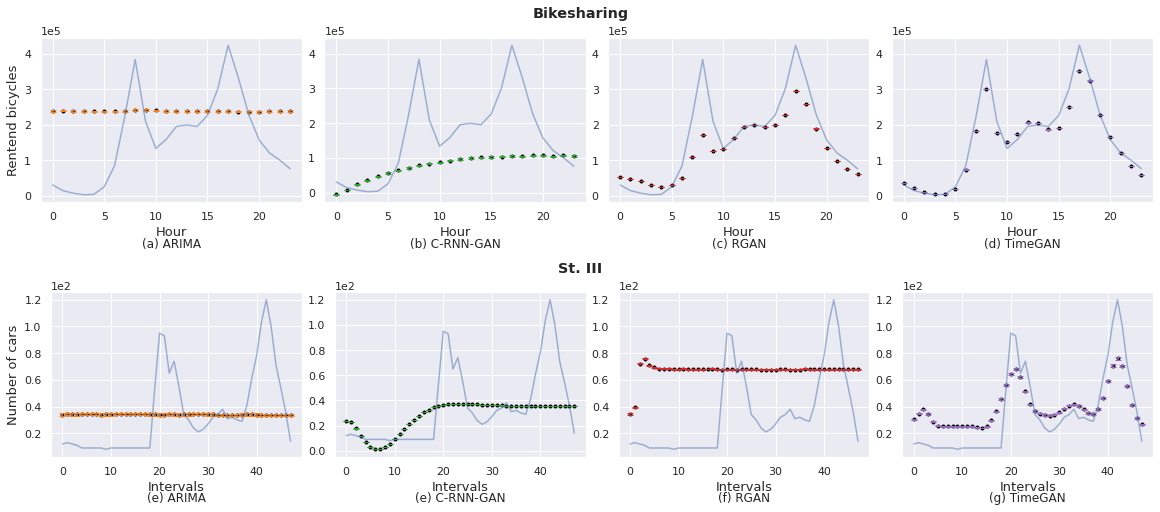

In [42]:
means = [means_bike, means_r3]
stds = [stds_bike, stds_r3]

modelos = ['arima', 'crnngan', 'rgan', 'timegan']
nomes_modelos = [['(a) ARIMA', '(b) C-RNN-GAN', '(c) RGAN', '(d) TimeGAN'],
                 ['(e) ARIMA', '(e) C-RNN-GAN', '(f) RGAN', '(g) TimeGAN']]
scalers = [scaler_bike, scaler_ruaIII]
datasets = ['Bikesharing', 'St. III']
y_labels = ['Rentend bicycles',  'Number of cars']
x_labels = ['Hour', 'Intervals']
wk_s = [24, 48]
cols_i = [1, 2, 3]
# create 3x1 subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16,7), constrained_layout=True)

# clear subplots
for ax in axs:
    ax.remove()

# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'{datasets[row]}', fontweight='bold')
    print (row)
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4,)
    for col, ax in enumerate(axs):
        ylabel = y_labels[row]
        if col in cols_i: ylabel = ''
        s = None
        m = modelos[col]
        if m != 'arima': s = scalers[row]
        ax_res = save_ic_mean_std(ax, means[row][col], stds[row][col], 
                            scaler_s=s, cor=cores[m],
                            w=wk_s[row], xlabel=x_labels[row], ylabel=ylabel,
                            path='r3_{}_media.pdf'.format(m), sci=True)
        ax_res.set_title('{}'.format(nomes_modelos[row][col]), y=-0.31)
        if row==0: ax_res.plot(wks_bike[4], alpha=0.5)
        elif row==1:ax_res.plot(wks_III[4], alpha=0.5)
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        #ax.set_title(f'{nomes_modelos[row][col]}', y=-0.31)
plt.savefig("plots/confidence_interval.eps")

In [ ]:
y = np.random.uniform(1000, 10000, 100)
x = np.arange(100)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y);
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

## Street IV

In [46]:
scaler_ruaIV = MinMaxScaler().fit(rua_48.reshape(-1,1))

In [44]:
df_stiv_timegan = pd.read_csv("sum_all_samples/ruas_4_8/4/df_rua4_sextas_timegan.csv", index_col=0)
df_stiv_rgan    = pd.read_csv("sum_all_samples/ruas_4_8/4/df_rua4_sextas_rgan.csv", index_col=0)
df_stiv_crnngan = pd.read_csv("sum_all_samples/ruas_4_8/4/df_rua4_sextas_crnngan.csv", index_col=0)

In [45]:
stds_st4_timegan = df_stiv_timegan.std(axis=0)
stds_st4_rgan    = df_stiv_rgan.std(axis=0)
stds_st4_crnngan = df_stiv_crnngan.std(axis=0)

means_st4_timegan = df_stiv_timegan.mean(axis=0)
means_st4_rgan    = df_stiv_rgan.mean(axis=0)
means_st4_crnngan = df_stiv_crnngan.mean(axis=0)

In [ ]:
# # rua_IV
# means_r4 = [means_st4_timegan,means_st4_rgan, means_st4_crnngan]
# stsds_r4 = [stds_st4_timegan, stds_st4_rgan,stds_st4_crnngan]
# modelos = ['timegan', 'rgan', 'crnngan']
# for i,m in enumerate(modelos):
#     save_shaded_mean_std(means_r4[i], stsds_r4[i], 
#                         scaler_s=scaler, cor=cores[m],
#                         w=48, xlabel='Intervals', ylabel='Number of cars',
#                         path='r4_{}_media.pdf'.format(m), sci=True)

In [ ]:
means = [means_r4,]
stds = [stsds_r4, ]

modelos = ['arima', 'crnngan', 'rgan', 'timegan']
nomes_modelos = ['(a) C-RNN-GAN', '(b) RGAN', '(c) TimeGAN']
scalers = [scaler_ruaIV]
datasets = ['St. IV']
y_labels = ['Number of cars']
x_labels = ['Intervals']
wk_s = [48]
cols_i = [1, 2]
# create 3x1 subplots
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,7), constrained_layout=True)

# clear subplots
# for ax in axs:
#     ax.remove()

# add subfigure per subplot
gridspec = axs[0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'{datasets[row]}', fontweight='bold')
    print (row)
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3,)
    for col, ax in enumerate(axs):
        ylabel = y_labels[row]
        if col in cols_i: ylabel = ''
        s = None
        m = modelos[col]
        if m != 'arima': s = scalers[row]
        ax_res = save_ic_mean_std(ax, means[row][col], stds_r4[col], 
                            scaler_s=s, cor=cores[m],
                            w=48, xlabel='Intervals', ylabel=ylabel,
                            path='r3_{}_media.pdf'.format(m), sci=True)
        ax_res.set_title('{}'.format(nomes_modelos[row][col]), y=-0.31)
        # if row==0: ax_res.plot(wks_bike[4], alpha=0.5)
        # elif row==1:ax_res.plot(wks_III[4], alpha=0.5)
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        #ax.set_title(f'{nomes_modelos[row][col]}', y=-0.31)
# plt.savefig("plots/confidence_interval.eps")

In [61]:
means_r4 = [means_st4_crnngan, means_st4_rgan, means_st4_timegan]
stds_r4 = [stds_st4_crnngan, stds_st4_rgan, stds_st4_timegan]

In [70]:
modelos

['arima', 'crnngan', 'rgan', 'timegan']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


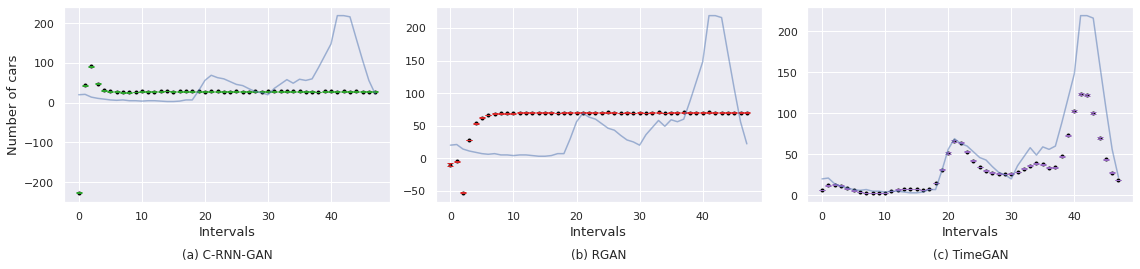

In [75]:
modelos_r4 = modelos[1:]
fig, axs = plt.subplots(ncols=3, figsize=(16,4))
cols_i = [1,2]

for col, ax in enumerate(axs):
    m = modelos_r4[col]
    yl='Number of cars'
    if col in cols_i:
        yl = ''
    ax_res = save_ic_mean_std(ax, means_r4[col], stds_r4[col], 
                            scaler_s=scaler_ruaIV, cor=cores[m],
                            w=48, xlabel='Intervals', ylabel=yl,
                            path=''.format(m), sci=True)
    ax_res.set_title('{}'.format(nomes_modelos[col]), y=-0.32)
    ax_res.plot(wks_r4[4], alpha=0.5)
plt.tight_layout()
plt.savefig("plots/confidence_interval_r4.eps")

# Distribuição dos Resíduos (Fig. 12)

### Bikesharing

In [22]:
#Real, Arima, c-rnn-gan, rgan, timegan
cores = {'real': "#1f77b4", 'arima':"#ff7f0e", 'crnngan':"#2ca02c", 'rgan':"#d62728", 'timegan':"#9467bd"}

In [ ]:
list_arima_resid_r0 = glob("arima/bikesharing/residuos/*.npy".format(r))

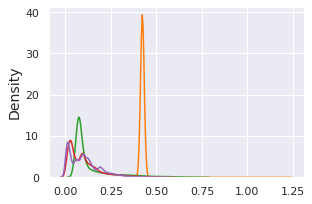

In [42]:
# TODO: pegar valores absolutos dos resíduos antes de calcular
list_arima_resid_r0 = glob("arima/bikesharing/residuos/*.npy".format(r))
list_timegan_resid_r0 = glob("timegan/bikesharing/residuos/*.npy".format(r))
list_rgan_resid_r0 = glob("rgan/bikesharing/residuos/*.npy".format(r))
list_resid_crnn_r0 = glob("crnn/bikesharing/residuos/*.npy".format(r))

array_list_arima_r0 = np.array([np.absolute(np.load(f)) for f in list_arima_resid_r0])
array_list_crnn_r0 = np.array([np.absolute(np.load(f)) for f in list_resid_crnn_r0])
array_list_rgan_r0 = np.array([np.absolute(np.load(f)) for f in list_rgan_resid_r0])
array_list_timegan_r0 = np.array([np.absolute(np.load(f)) for f in list_timegan_resid_r0])

# lista de modelos
modelos = ['ARIMA', 'C-RNN-GAN', 'RGAN', 'TimeGAN']
# arrays
arquivos = [array_list_arima_r0, array_list_crnn_r0, array_list_rgan_r0, array_list_timegan_r0]
# médias de todos os arquivos
medias_r0 = [np.mean(a, axis=0) for a in arquivos]
# tamanho mínimo dos resíduos
min_size = min([len(m) for m in medias_r0])
kdes_r0 = {modelos[i]:m[:min_size] for i, m in enumerate(medias_r0)}
df_kdes_r0 = pd.DataFrame(kdes_r0)

color_pallet = [cores[m] for m in ['arima', 'crnngan', 'rgan','timegan']]

fig, ax = plt.subplots(figsize=(4.5, 3))
for i, m in enumerate(modelos):
    sns.kdeplot(df_kdes_r0[m], ax=ax, label=m, color=color_pallet[i])
plt.ylabel("Density", fontdict={"fontsize":14})
plt.xlabel("")
plt.tight_layout()
# plt.savefig("plots/residuals/bikesharing.pdf".format(r))
plt.show()

In [ ]:
ylabel='CDF'
fig, ax = plt.subplots(figsize=(4.5, 3))
for i, m in enumerate(modelos):
    sns.kdeplot(df_kdes_r0[m], ax=ax, label=m, color=color_pallet[i], cumulative=True)
plt.ylabel(ylabel, fontdict={"fontsize":14})
plt.xlabel("")
plt.tight_layout()
plt.savefig("plots/cdfs/bikesharing_cdf.pdf".format(r))
plt.show()

### Exemplo resíduo Rua I, II e III

(**Obs**. Provavelmente vai ficar um pouco diferente do que está lá no artigo. Só percebi agora que não está totalmente certo)

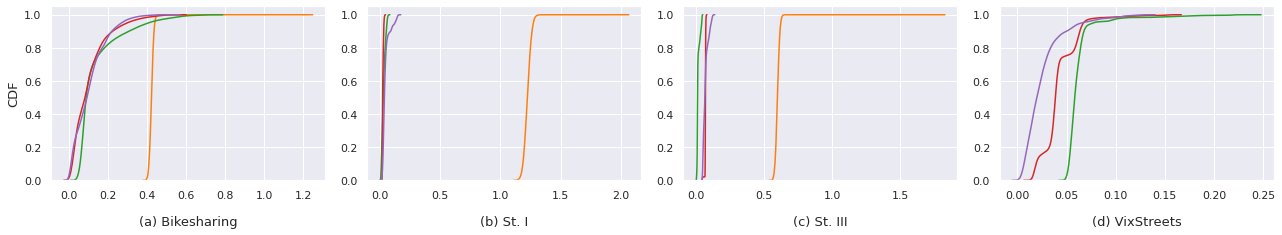

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(18, 3.5))
for i, m in enumerate(modelos):
    sns.kdeplot(df_kdes_r0[m], ax=ax[0], label=m, color=color_pallet[i], cumulative=True)
lista_df_residuos = []
for k, r in enumerate(['I', "III"]):
    list_arima_resid_r0 = glob("arima/transito_vitoria/rua_{}/residuos/*.npy".format(r))
    list_timegan_resid_r0 = glob("timegan/transito_vitoria/rua_{}/residuos/*.npy".format(r))
    list_rgan_resid_r0 = glob("rgan/transito_vitoria/rua_{}/residuos/*.npy".format(r))
    list_resid_crnn_r0 = glob("crnn/transito_vitoria/rua_{}/residuos/*.npy".format(r))

    array_list_arima_r0 = np.array([np.absolute(np.load(f)) for f in list_arima_resid_r0])
    array_list_crnn_r0 = np.array([np.absolute(np.load(f)) for f in list_resid_crnn_r0])
    array_list_rgan_r0 = np.array([np.absolute(np.load(f)) for f in list_rgan_resid_r0])
    array_list_timegan_r0 = np.array([np.absolute(np.load(f)) for f in list_timegan_resid_r0])

    # lista de modelos
    modelos = ['ARIMA', 'C-RNN-GAN', 'RGAN', 'TimeGAN']
    # arrays
    arquivos = [array_list_arima_r0, array_list_crnn_r0, array_list_rgan_r0, array_list_timegan_r0]
    # médias de todos os arquivos
    medias_ruas = [np.mean(a, axis=0) for a in arquivos]
    # tamanho mínimo dos resíduos
    min_size = min([len(m) for m in medias_ruas])
    kdes_ruas = {modelos[i]:m[:min_size] for i,m in enumerate(medias_ruas)}
    df_kdes_ruas = pd.DataFrame(kdes_ruas)

    lista_df_residuos.append(df_kdes_ruas)
    
    color_pallet = [cores[m] for m in ['arima', 'crnngan', 'rgan','timegan']]

    for j, m in enumerate(modelos):
        sns.kdeplot(df_kdes_ruas[m], ax=ax[k+1], label=m, color=color_pallet[j], cumulative=True)

    # plt.ylabel(ylabel, fontdict={"fontsize":14})
    # plt.xlabel("")
    # plt.tight_layout()
    # plt.savefig("plots/cdfs/st_{}.pdf".format(r))
    # plt.show()

list_timegan_resid_r0 = glob("timegan/transito_vitoria/ruas/residuos/*.npy")
list_rgan_resid_r0 = glob("rgan/transito_vitoria/ruas/residuos/*.npy")
list_resid_crnn_r0 = glob("crnn/transito_vitoria/ruas/residuos/*.npy")

array_list_crnn_r0 = np.array([np.absolute(np.load(f)) for f in list_resid_crnn_r0])
array_list_rgan_r0 = np.array([np.absolute(np.load(f)) for f in list_rgan_resid_r0])
array_list_timegan_r0 = np.array([np.absolute(np.load(f)) for f in list_timegan_resid_r0])

# lista de modelos
modelos_r48 = ['C-RNN-GAN', 'RGAN', 'TimeGAN']
# arrays
arquivos = [array_list_crnn_r0, array_list_rgan_r0, array_list_timegan_r0]
# médias de todos os arquivos
medias_r48 = [np.mean(a, axis=0).reshape(a.shape[1]*a.shape[-1]) for a in arquivos]
# tamanho mínimo dos resíduos
min_size = min([len(m) for m in medias_r48])
kdes_r48 = {modelos_r48[i]:m[:min_size] for i,m in enumerate(medias_r48)}
df_kdes_r48 = pd.DataFrame(kdes_r48)

color_pallet_48 = [cores[m] for m in ['crnngan', 'rgan','timegan']]   
for j, m in enumerate(modelos_r48):
        sns.kdeplot(df_kdes_r48[m], ax=ax[3], label=m, color=color_pallet_48[j], cumulative=True)


ax[0].set_ylabel("CDF", fontdict={'fontsize':13})
ax[1].set_ylabel("",)
ax[2].set_ylabel("",)
ax[3].set_ylabel("",)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")
ax[3].set_xlabel("")

ax[0].set_title("(a) Bikesharing", y=-.29, fontdict={'fontsize':13})
ax[1].set_title("(b) St. I",  y=-.29, fontdict={'fontsize':13})
ax[2].set_title("(c) St. III",  y=-.29, fontdict={'fontsize':13})
ax[3].set_title("(d) VixStreets",  y=-.29, fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig("plots/cdfs/todos_cdf.eps")
plt.savefig("plots/cdfs/todos_cdf.pdf")

In [ ]:
print ("Rua I")
lista_df_residuos[0].mean()

In [ ]:
print ("Rua I")
lista_df_residuos[0].std()

## Ruas IV_VIII

In [19]:
list_timegan_resid_r0 = glob("timegan/transito_vitoria/ruas/residuos/*.npy")
list_rgan_resid_r0 = glob("rgan/transito_vitoria/ruas/residuos/*.npy")
list_resid_crnn_r0 = glob("crnn/transito_vitoria/ruas/residuos/*.npy")

In [20]:
len(list_timegan_resid_r0)

1000

In [26]:
list_timegan_resid_r0 = glob("timegan/transito_vitoria/ruas/residuos/*.npy")
list_rgan_resid_r0 = glob("rgan/transito_vitoria/ruas/residuos/*.npy")
list_resid_crnn_r0 = glob("crnn/transito_vitoria/ruas/residuos/*.npy")

array_list_crnn_r0 = np.array([np.absolute(np.load(f)) for f in list_resid_crnn_r0])
array_list_rgan_r0 = np.array([np.absolute(np.load(f)) for f in list_rgan_resid_r0])
array_list_timegan_r0 = np.array([np.absolute(np.load(f)) for f in list_timegan_resid_r0])

# lista de modelos
modelos = ['C-RNN-GAN', 'RGAN', 'TimeGAN']
# arrays
arquivos = [array_list_crnn_r0, array_list_rgan_r0, array_list_timegan_r0]
# médias de todos os arquivos
medias_r0 = [np.mean(a, axis=0).reshape(a.shape[1]*a.shape[-1]) for a in arquivos]
# tamanho mínimo dos resíduos
min_size = min([len(m) for m in medias_r0])
kdes_r0 = {modelos[i]:m[:min_size] for i,m in enumerate(medias_r0)}
df_kdes_r0 = pd.DataFrame(kdes_r0)

color_pallet = [cores[m] for m in ['crnngan', 'rgan','timegan']]   

In [15]:
arquivos[2].shape

(0,)

In [ ]:
df_kdes_r0.mean()

In [ ]:
df_kdes_r0.std()

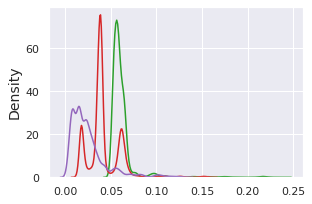

In [27]:
r = 'r48'
fig, ax = plt.subplots(figsize=(4.5, 3))
for i, m in enumerate(modelos):
    sns.kdeplot(df_kdes_r0[m], ax=ax, label=m, color=color_pallet[i])
plt.ylabel("Density", fontdict={"fontsize":14})
plt.xlabel("")
plt.tight_layout()
#plt.savefig("plots/residuals/st_{}.pdf".format(r))
plt.show()

In [ ]:
np.mean(a, axis=0).reshape(a.shape[1]*a.shape[-1]).shape

In [ ]:
r = "I"
list_arima_resid_r0 = glob("arima/transito_vitoria/rua_{}/residuos/*.npy".format(r))
list_timegan_resid_r0 = glob("timegan/transito_vitoria/rua_{}/residuos/*.npy".format(r))
list_rgan_resid_r0 = glob("rgan/transito_vitoria/rua_{}/residuos/*.npy".format(r))
list_resid_crnn_r0 = glob("crnn/transito_vitoria/rua_{}/residuos/*.npy".format(r))

array_list_arima_r0 = np.array([np.load(f) for f in list_arima_resid_r0])
array_list_crnn_r0 = np.array([np.load(f) for f in list_resid_crnn_r0])
array_list_rgan_r0 = np.array([np.load(f) for f in list_rgan_resid_r0])
array_list_timegan_r0 = np.array([np.load(f) for f in list_timegan_resid_r0])

In [ ]:
# lista de modelos
modelos = ['ARIMA', 'C-RNN-GAN', 'RGAN', 'TimeGAN']
# arrays
arquivos = [array_list_arima_r0, array_list_crnn_r0, array_list_rgan_r0, array_list_timegan_r0]
# médias de todos os arquivos
medias_r0 = [np.mean(a, axis=0) for a in arquivos]
print (medias_r0[0].shape)
# # tamanho mínimo dos resíduos
# min_size = min([len(m) for m in medias_r0])
# kdes_r0 = {modelos[i]:m[:min_size] for i,m in enumerate(medias_r0)}
# df_kdes_r0 = pd.DataFrame(kdes_r0)
# df_kdes_r0.head()

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
for i, m in enumerate(modelos):
    sns.kdeplot(df_kdes_r0[m], ax=ax, label=m, color=color_pallet[i], common_norm=True)
plt.ylabel("Density", fontdict={"fontsize":14})
plt.xlabel("")
plt.tight_layout()
plt.show()

In [1]:
import pylab

In [ ]:
fig = pylab.figure()
figlegend = pylab.figure(figsize=(5,0.3))
ax = fig.add_subplot(111)
for i, m in enumerate(modelos):
    sns.kdeplot(df_kdes_r0[m], ax=ax, label=m, color=color_pallet[i])
lines = ax.get_lines()
figlegend.legend(lines, ('ARIMA', 'C-RNN-GAN', 'RGAN', 'TimeGAN'), 'center', ncol=4)
fig.show()
figlegend.show()
figlegend.savefig('legend.pdf')
figlegend.savefig('legend.png')


In [7]:
cores

{'real': '#1f77b4',
 'arima': '#ff7f0e',
 'crnngan': '#2ca02c',
 'rgan': '#d62728',
 'timegan': '#9467bd'}

In [ ]:
modelos = ['Real', 'ARIMA', 'C-RNN-GAN', 'RGAN', 'TimeGAN']

/home/iran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == "__main__":
/home/iran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


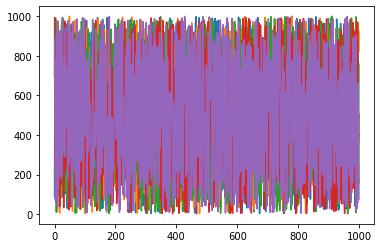

<Figure size 432x21.6 with 0 Axes>

In [13]:
fig = pylab.figure()
figlegend = pylab.figure(figsize=(6,0.3))
ax = fig.add_subplot(111)
for i, m in enumerate(cores.keys()):
    # sns.kdeplot(, , ax=ax, label=m, color=cores[m])
    ax.plot(np.arange(1000),np.random.uniform(1000, size=1000), label=m, color=cores[m])
lines = ax.get_lines()
figlegend.legend(lines, ('Real', 'ARIMA', 'C-RNN-GAN', 'RGAN', 'TimeGAN'), 'center', ncol=5)
fig.show()
figlegend.show()
figlegend.savefig('legend_fig7_8.pdf')
figlegend.savefig('legend_fig7_8.png')


/home/iran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/home/iran/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


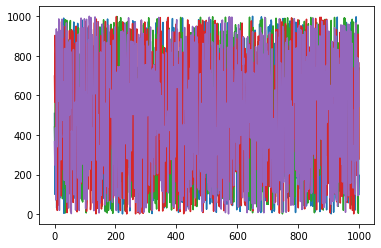

<Figure size 360x21.6 with 0 Axes>

In [17]:
fig = pylab.figure()
figlegend = pylab.figure(figsize=(5,0.3))
ax = fig.add_subplot(111)
for i, m in enumerate(cores.keys()):
    # sns.kdeplot(, , ax=ax, label=m, color=cores[m])
    if m!='arima':
        ax.plot(np.arange(1000),np.random.uniform(1000, size=1000), label=m, color=cores[m])
lines = ax.get_lines()
figlegend.legend(lines, ('Real', 'C-RNN-GAN', 'RGAN', 'TimeGAN'), 'center', ncol=4)
fig.show()
figlegend.show()
figlegend.savefig('legend_fig8.pdf')
figlegend.savefig('legend_fig8.png')
